注意力的可视化

In [6]:
import torch
from d2l import torch as d2l 

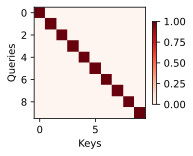

In [7]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]  # 热图的行数，列数
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)): 
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    # shrink=0.6 缩小为原来的60%
    fig.colorbar(pcm, ax=axes, shrink=0.6)

attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

随机生成10x10矩阵并使用softmax运算(确保每行是有效的概率分布)，然后可视化输出注意力权重

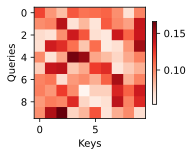

In [16]:
matrix = torch.rand(1, 1, 10, 10)
softmax_matrix = torch.softmax(matrix, dim=3)
show_heatmaps(softmax_matrix, xlabel='Keys', ylabel='Queries')